In [2]:
import sys
sys.path.append('../../30_data_tools/')
sys.path.append('../process_masks/')

In [3]:
from pathlib import Path
import random

In [4]:
from PIL import Image
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [5]:
from load_dataset import get_available_moires

In [12]:
from helper import load_dotenv
from get_labelstudio_data import get_moires_of_project, get_results_of_project
from mask_functions import load_masks, get_whole_mask

In [7]:
import re

In [9]:
dotenv = load_dotenv()

In [10]:
IMG_SIZE = (
    280,
    280
)
MIN_MASK_PARTIAL = 0.5

In [14]:
def get_masks_path( row ):
    return row.img_path.parent / row.img_path.name.replace('.4c.jpg','.masks.pkl')

In [75]:
def process_row( rows ):
    images = list(rows.iloc[0].img_path.parent.parent.glob(f'./vps2400dpi*lpi/{rows.iloc[0].img_path.name.strip(".4c" + rows.iloc[0].img_path.suffix)}*.jpg'))

    if len(images) > 0:
        img_path = images[0]
        masks = load_masks( get_masks_path( rows.iloc[0] ) )
        total_mask = np.zeros((1,1))
        
        for i in range(rows.shape[0]):
            row = rows.iloc[i]
            mask = [m for m in masks if m['bbox'] == row.bbox][0]
            whole_mask = get_whole_mask(mask).astype('bool')
            
            if total_mask.shape[0] == 1 and total_mask.shape[1] == 1:
                total_mask = np.zeros(whole_mask.shape)
            
            total_mask[whole_mask] = 1


        return total_mask

total_mask = process_row( df.loc[df.img_path == df.iloc[0].img_path] )

False True
False True


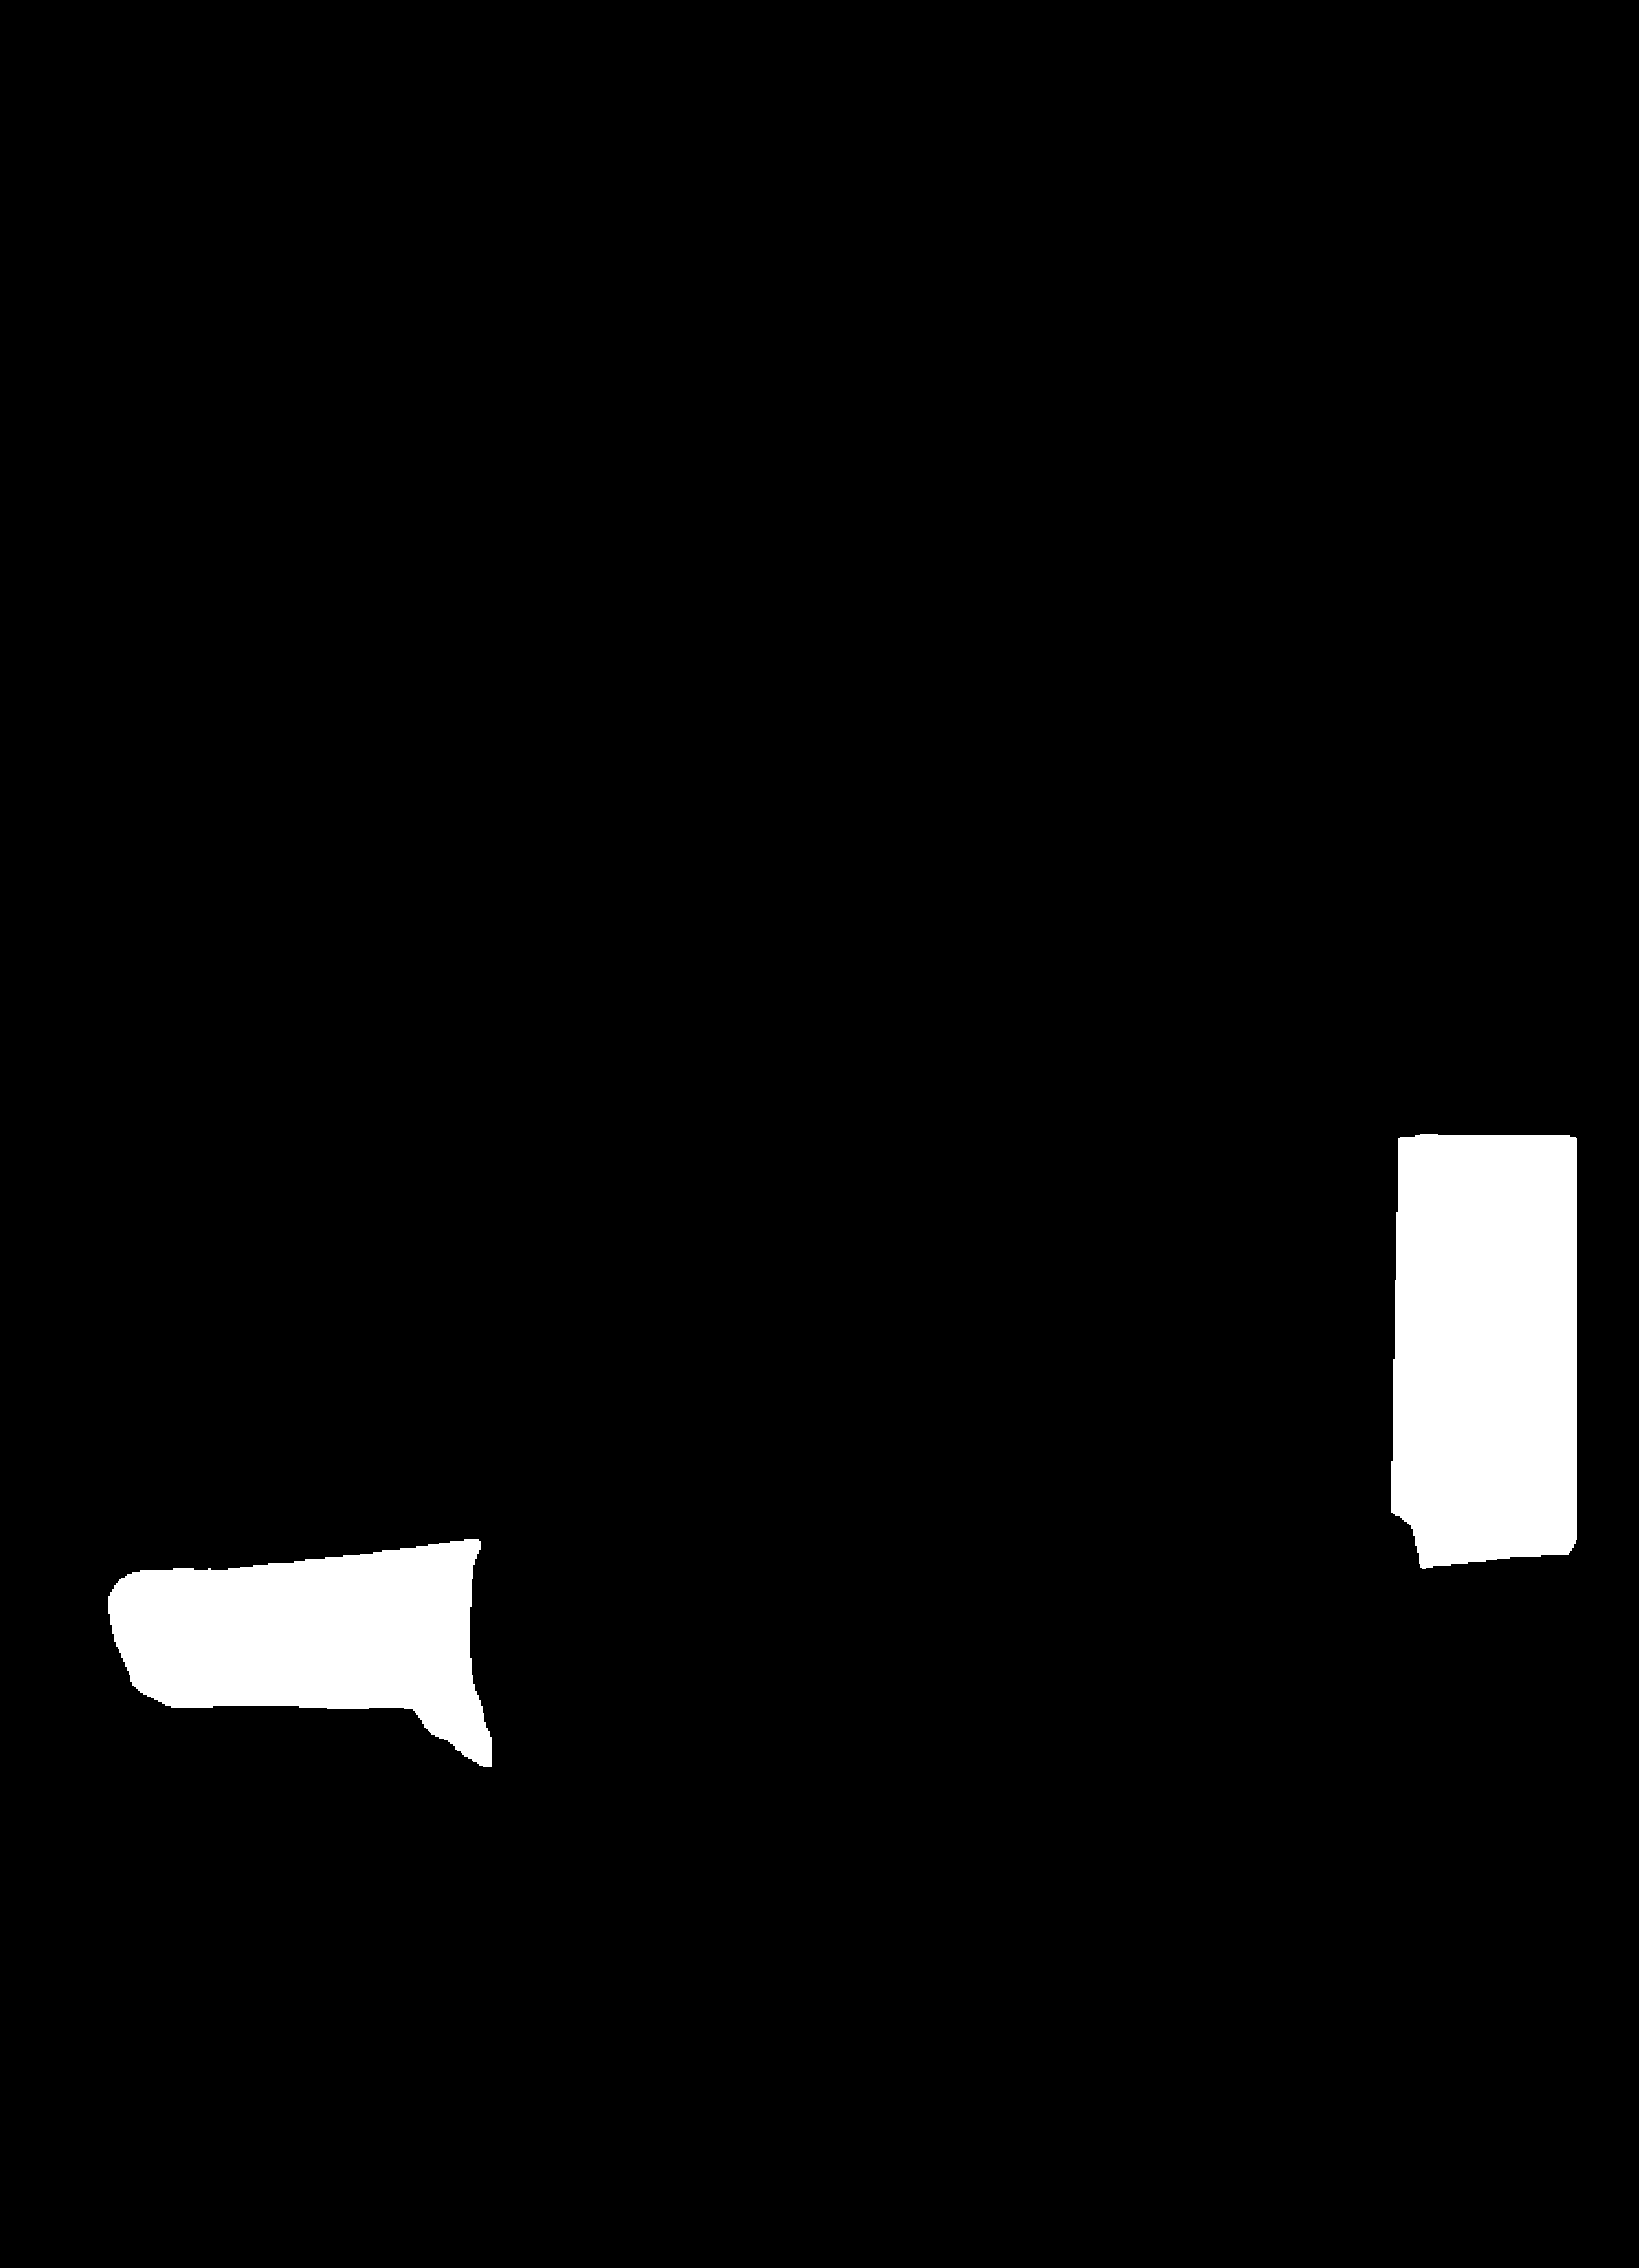

In [80]:
Image.fromarray(total_mask * 255).convert('L')

In [59]:
df.groupby('img_path').count()

,image,method,ssim,bbox,use_blow_up_centered,use_contract_centered,use_pillow_disortion,use_roll,use_rotation,use_scale,...,blow_up_radius,blow_up_center,blow_up_c,contract_count,contract_radius,contract_center,contract_c,img_name,bbox_str,label
img_path,,,,,,,,,,,,,,,,,,,,,
/Users/frederic.birwe/Library/CloudStorage/OneDrive-BertelsmannSE&Co.KGaA/Masterarbeit/20_data/148013/halftone600dpi/tg39_67029_1_1_2022_082-129_Kapitel2_DA 29.p1.4c.jpg,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,1,1,1
/Users/frederic.birwe/Library/CloudStorage/OneDrive-BertelsmannSE&Co.KGaA/Masterarbeit/20_data/148013/halftone600dpi/tg39_67029_1_1_2022_082-129_Kapitel2_DA 41.p1.4c.jpg,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,3,3,3
/Users/frederic.birwe/Library/CloudStorage/OneDrive-BertelsmannSE&Co.KGaA/Masterarbeit/20_data/148013/halftone600dpi/tg39_67029_1_1_2022_130-189_Kapitel3_DA.p15.4c.jpg,4,4,4,4,4,4,4,4,4,4,...,1,1,1,0,0,0,0,4,4,4
/Users/frederic.birwe/Library/CloudStorage/OneDrive-BertelsmannSE&Co.KGaA/Masterarbeit/20_data/148013/halftone600dpi/tg39_67029_1_1_2022_130-189_Kapitel3_DA.p18.4c.jpg,6,6,6,6,6,6,6,6,6,6,...,1,1,1,1,1,1,1,6,6,6
/Users/frederic.birwe/Library/CloudStorage/OneDrive-BertelsmannSE&Co.KGaA/Masterarbeit/20_data/148013/halftone600dpi/tg39_67029_1_1_2022_130-189_Kapitel3_DA.p19.4c.jpg,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/Users/frederic.birwe/Library/CloudStorage/OneDrive-BertelsmannSE&Co.KGaA/Masterarbeit/20_data/616466/halftone600dpi/tg45_000_INM0323_DE_MEN_KERN_TAUSCH_kor1.p55.4c.jpg,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,1
/Users/frederic.birwe/Library/CloudStorage/OneDrive-BertelsmannSE&Co.KGaA/Masterarbeit/20_data/616466/halftone600dpi/tg45_000_INM0323_DE_MEN_KERN_TAUSCH_kor1.p71.4c.jpg,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,2,2,2
/Users/frederic.birwe/Library/CloudStorage/OneDrive-BertelsmannSE&Co.KGaA/Masterarbeit/20_data/616466/halftone600dpi/tg45_000_INM0323_DE_MEN_KERN_TAUSCH_kor1.p84.4c.jpg,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,2,2,2


In [ ]:
DATASET_DIR = Path('./dataset/')

In [ ]:
def write_tiles( data, labels, set_name ):
    set_dir = DATASET_DIR / set_name
    if set_dir.exists() == False:
        set_dir.mkdir()

    for i in tqdm(range(len(data))):
        parent_dir_name = 'no_moire' if labels[i] == 0 else 'moire'
        parent_dir = set_dir / parent_dir_name

        if parent_dir.exists() == False:
            parent_dir.mkdir()
        
        out_path = parent_dir / f"{str(i).zfill(4)}.jpg"
    
        img = Image.fromarray( np.uint8(data[i] * 255) ).convert('RGB')
        img.save( out_path, progressive=True )

In [ ]:
0 / 0

In [34]:
df = get_available_moires()

In [ ]:
TEST_SIZE = .2
VAL_SIZE = .1

In [ ]:
sample = df.sample(frac=1)
test_limiter = round(sample.shape[0] * TEST_SIZE)
val_limiter = test_limiter + round(sample.shape[0] * VAL_SIZE)

test_rows = sample.iloc[:test_limiter]
val_rows = sample.iloc[test_limiter:val_limiter]
train_rows = sample.iloc[val_limiter:]

In [ ]:
generate_tiles( train_rows, 'train' )
generate_tiles( test_rows, 'test' )
generate_tiles( val_rows, 'val' )

# Real Validation schreiben

In [ ]:
moires = get_moires_of_project(1)

In [ ]:
def get_moire_mask_path( img_name ):
    jobname, filename = re.match(r'(.+?)\..+?\.(.+)\..+?\.jpg', img_name).groups()
    
    return dotenv['DATA_DIR'] / jobname / "halftone600dpi" / f"{ filename }.masks.pkl"

In [ ]:
def calc_bbox_iou( bbox_a, bbox_b ):
    intersection_box = [
        max([bbox_a[0], bbox_b[0]]),
        max([bbox_a[1], bbox_b[1]]),
        min([bbox_a[0]+bbox_a[2], bbox_b[0]+bbox_b[2]]),
        min([bbox_a[1]+bbox_a[3], bbox_b[1]+bbox_b[3]])
    ]
    intersection = (intersection_box[0] - intersection_box[2]) * (intersection_box[1] - intersection_box[3])

    union_box = [
        min([bbox_a[0], bbox_b[0]]),
        min([bbox_a[1], bbox_b[1]]),
        max([bbox_a[0]+bbox_a[2], bbox_b[0]+bbox_b[2]]),
        max([bbox_a[1]+bbox_a[3], bbox_b[1]+bbox_b[3]])
    ]
    union = (union_box[0] - union_box[2]) * (union_box[1] - union_box[3])

    if intersection < 0:
        return 0
    
    return intersection / union

In [ ]:
MIN_IOU = 0.9

In [ ]:
def process_real_moire( moire ):
    mask_path = get_moire_mask_path( moire['img_name'] )
    img_path = dotenv['LABEL_STUDIO_DIR'] / moire['img_name']
    use_mask = False

    if mask_path.exists():
        masks = load_masks(mask_path)
        max_iou = -1
        max_mask = None
        
        for mask in masks:
            iou = calc_bbox_iou(
                [moire['value']['x'],moire['value']['y'],moire['value']['width'],moire['value']['height']],
                [val / 2 for val in mask['bbox']]
            )
            
            if iou > MIN_IOU and iou > max_iou:
                max_iou = iou
                max_mask = mask
                use_mask = True

    img = Image.open(img_path)
    cropped_img = img.crop((
        moire['value']['x'],
        moire['value']['y'],
        moire['value']['x'] + moire['value']['width'],
        moire['value']['y'] + moire['value']['height']
    ))
    
    tiles = cut_img_to_tiles(
        1 - np.array(cropped_img)[:,:,3] / 255,
        mask=max_mask if use_mask else None
    )

    return tiles

In [ ]:
tiles = []
for m in tqdm(moires):
    tiles += process_real_moire(m)

In [ ]:
len(tiles)

In [ ]:
write_tiles( tiles, [1 for t in tiles], 'real_val' )